In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv('examination.txt', sep='\t')

X = data[['P1', 'P2']]
X1 = data[['P1']]
X2 = data[['P2']]
Y = data['F']

a) For each of the three models, draw the P-R plot. Identify all unusual observations (by number) and classify as outlier, high-leverage point, and/or influential observation.

Model 1: F = \beta_0 + \beta_1 P_1 +\epsilon
Model 2: F = \beta_0 + \beta_2 P_2 + \epsilon 
Model 3: F = \beta_0 + \beta_1 P_1 + \beta_2 P_2 + \epsilon

d_i = e_i / sqrt(SSE)
P = X (X^T X)^{-1} X^T  (Projection matrix. Also called hat matrix H.)

Plot p_ii / (1 - p_{ii}) versus (1 + p) (d_i)^2 / [ (1 - (p_{ii})^2) (1 - (d_i)^2) ].

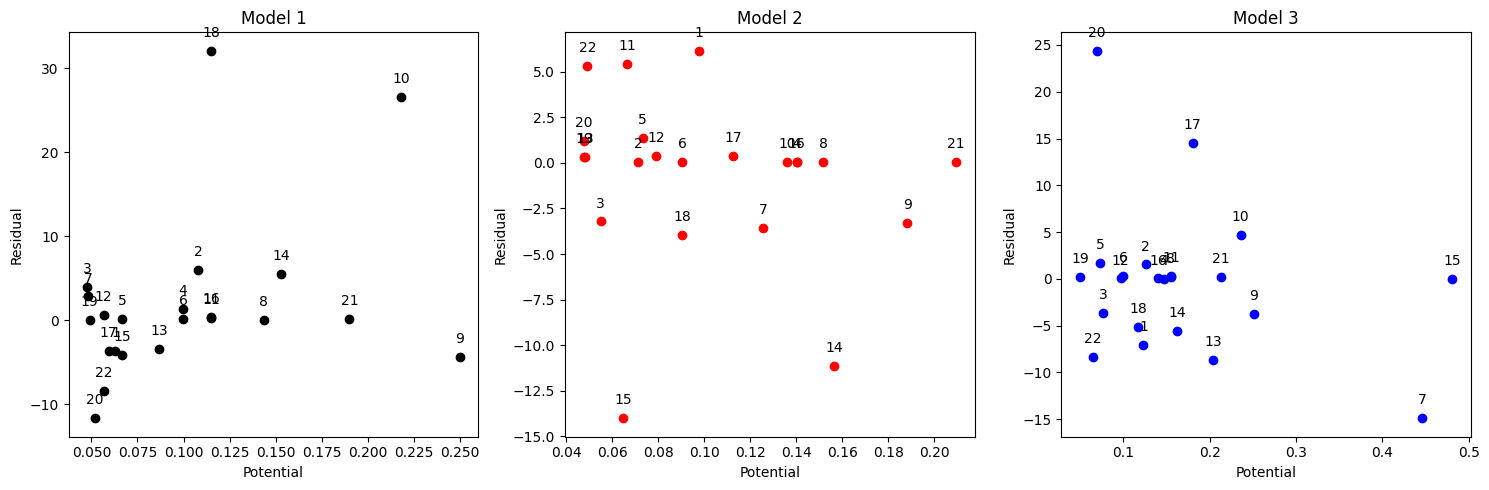

In [15]:
X = sm.add_constant(X)  
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)

model_1 = sm.OLS(Y, X1).fit()
model_2 = sm.OLS(Y, X2).fit()
model_3 = sm.OLS(Y, X).fit()

leverage_model_1 = model_1.get_influence().hat_matrix_diag
leverage_model_2 = model_2.get_influence().hat_matrix_diag
leverage_model_3 = model_3.get_influence().hat_matrix_diag

d_ii_model_1 = model_1.get_influence().resid_studentized_internal 
d_ii_model_2 = model_2.get_influence().resid_studentized_internal
d_ii_model_3 = model_3.get_influence().resid_studentized_internal

potential_function_model_1 = np.divide(leverage_model_1, (1 - leverage_model_1))  # Calculate p_ii / (1 - p_ii) for model 1.
potential_function_model_2 = np.divide(leverage_model_2, (1 - leverage_model_2))
potential_function_model_3 = np.divide(leverage_model_3, (1 - leverage_model_3))

residual_function_model_1 = 2 * d_ii_model_1**2 / (np.multiply(np.multiply(1 - leverage_model_1, 1 - leverage_model_1), (1 - d_ii_model_1**2))) # p = 1
residual_function_model_2 = 2 * d_ii_model_2**2 / (np.multiply(np.multiply(1 - leverage_model_2, 1 - leverage_model_2), (1 - d_ii_model_2**2))) # p = 1
residual_function_model_3 = 2 * d_ii_model_3**2 / (np.multiply(np.multiply(1 - leverage_model_3, 1 - leverage_model_3), (1 - d_ii_model_3**2))) # p = 2

# Plot Potential versus Residuals 
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(potential_function_model_1, residual_function_model_1, color='black')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 1')
for i, txt in enumerate(range(1, len(data) + 1)):
    plt.annotate(txt, (potential_function_model_1[i], residual_function_model_1[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.subplot(1, 3, 2)
plt.scatter(potential_function_model_2, residual_function_model_2, color='red')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 2')
for i, txt in enumerate(range(1, len(data) + 1)):
    plt.annotate(txt, (potential_function_model_2[i], residual_function_model_2[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.subplot(1, 3, 3)
plt.scatter(potential_function_model_3, residual_function_model_3, color='blue')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 3')
for i, txt in enumerate(range(1, len(data) + 1)):
    plt.annotate(txt, (potential_function_model_3[i], residual_function_model_3[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


(b) What model would you use to predict the final score F?

The majority of the points resemble a linear relationship in model 2. 

Observation 1,11, 15, 14, 22, which are some of high-leverage points, 
are located by itself in the upper-left corner of the plot. 

Outliers (21, 10, 9) are located in the right area of the graph. 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


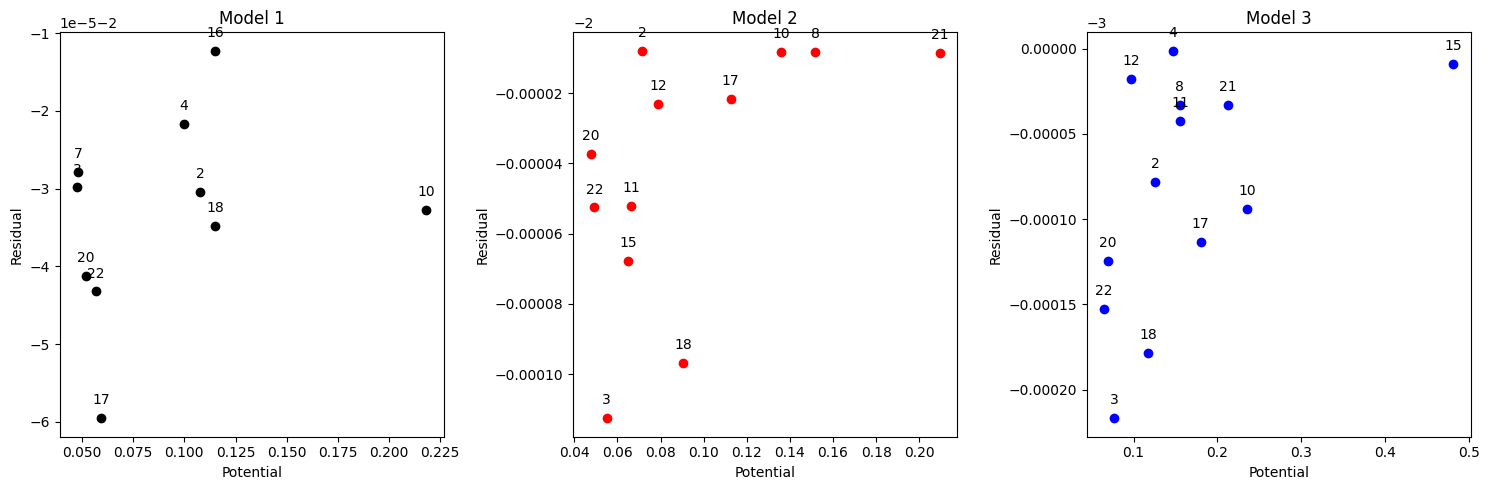

In [23]:
# Only residuals and SSE's are calculated by using a library in the following code.

# Create X matrix in hat matrix H for each model.
ones_column_1 = np.ones((X1.shape[0], 1))  # Create a column of ones with shape (22, 1)
X_model_1 = np.hstack((ones_column_1, X1))
ones_column_2 = np.ones((X2.shape[0], 1))
X_model_2 = np.hstack((ones_column_2, X2))
ones_column_3 = np.ones((X.shape[0], 1))
X_model_3 = np.hstack((ones_column_3, X))

# Calculate projection matrix P for each model.
P_model_1 = X_model_1 @ np.linalg.pinv(X_model_1.T @ X_model_1) @ X_model_1.T
P_model_2 = X_model_2 @ np.linalg.pinv(X_model_2.T @ X_model_2) @ X_model_2.T
P_model_3 = X_model_3 @ np.linalg.pinv(X_model_3.T @ X_model_3) @ X_model_3.T

#Calculate p_ii's for each model.
p_i_model_1 = np.diag(P_model_1)
p_i_model_2 = np.diag(P_model_2)
p_i_model_3 = np.diag(P_model_3)

# Calculate potential function for each model.
Potential_function_model_1 = np.divide(p_i_model_1, 1 - p_i_model_1)
Potential_function_model_2 = np.divide(p_i_model_2, 1 - p_i_model_2)
Potential_function_model_3 = np.divide(p_i_model_3, 1 - p_i_model_3)

# Pull out SSE vector for each model.
residual_model_1 = model_1.ssr
residual_model_2 = model_2.ssr
residual_model_3 = model_3.ssr

# Pull out residual vector for each model.
SSE_model_1 = model_1.resid
SSE_model_2 = model_2.resid
SSE_model_3 = model_3.resid

# Calculate d(d_1, d_2, ...) vector for each model.
d_model_1 = np.divide(residual_model_1, np.sqrt(SSE_model_1))
d_model_2 = np.divide(residual_model_2, np.sqrt(SSE_model_2))
d_model_3 = np.divide(residual_model_3, np.sqrt(SSE_model_3))

# Calculate residual function for each model. Note that p is the number of predictors.
# p=1, p=1 and p=2 for models 1,2 and 3, respectively.
# Assuming you have p_i_model_1 and d_model_1 arrays defined

# Calculate the elements for the residual function for model 1
Residual_function_model_1 = (1 + 1) * np.multiply(np.multiply(d_model_1, d_model_1), 
                                              np.divide(1 - np.multiply(p_i_model_1, p_i_model_1),
                                                        np.multiply(1 - np.multiply(p_i_model_1, p_i_model_1),
                                                                    1 - np.multiply(d_model_1, d_model_1))))
Residual_function_model_2 = (1 + 1) * np.multiply(np.multiply(d_model_2, d_model_2), 
                                              np.divide(1 - np.multiply(p_i_model_2, p_i_model_2),
                                                        np.multiply(1 - np.multiply(p_i_model_2, p_i_model_2),
                                                                    1 - np.multiply(d_model_2, d_model_2))))
Residual_function_model_3 = (1 + 2) * np.multiply(np.multiply(d_model_3, d_model_3), 
                                              np.divide(1 - np.multiply(p_i_model_3, p_i_model_3),
                                                        np.multiply(1 - np.multiply(p_i_model_3, p_i_model_3),
                                                                    1 - np.multiply(d_model_3, d_model_3))))                                                                    

# Plot potential versus residual.
# Plot Potential versus Residuals 
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(Potential_function_model_1, Residual_function_model_1, color='black')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 1')
for i, txt in enumerate(range(1, len(data) + 1)):
    plt.annotate(txt, (Potential_function_model_1[i], Residual_function_model_1[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.subplot(1, 3, 2)
plt.scatter(Potential_function_model_2, Residual_function_model_2, color='red')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 2')
for i, txt in enumerate(range(1, len(data) + 1)):
    plt.annotate(txt, (Potential_function_model_2[i], Residual_function_model_2[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.subplot(1, 3, 3)
plt.scatter(Potential_function_model_3, Residual_function_model_3, color='blue')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 3')
for i, txt in enumerate(range(1, len(data) + 1)):
    plt.annotate(txt, (Potential_function_model_3[i], Residual_function_model_3[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()
